# 项目：学生考试成绩数据集

## 简介

该数据集包括公立学校学生的三个测试分数，以及可能对考试分数产生影响的个人和社会因素，包括家长教育背景、婚姻状况、学习时间等。
此数据集可以用于对可能影响学生考试成绩的因素提供见解，并构建机器学习模型，根据不同因素来预测学生分数。

变量含义：
- `Gender`：学生的性别（男/女）
- `EthnicGroup`：学生的民族（A至E组）
- `ParentEduc`：家长教育背景（从高中到硕士）
- `LunchType`：学校午餐类型（标准或免费/降价）
- `TestPre`：模拟测试（已完成或无）
- `ParentMaritalStatus`：父母的婚姻状况（已婚/单身/丧偶/离婚）
- `PracticeSport`：学生练习体育的频率（从不/有时/定期）
- `IsFirstChild`：如果孩子是否是家庭中的第一个孩子（是/否）
- `NrSiblings`：学生的兄弟姐妹数量（0到7）
- `TransportMeans`：上学的交通工具（校车/私家车）
- `WklyStudyHours`：每周自学时间（少于5小时；5至10小时；超过10小时）
- `MathScore`：数学考试成绩（0-100）
- `ReadingScore`：阅读测试分数（0-100）
- `WritingScore`：写作测试分数（0-100）

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./student_scores.csv")

In [5]:
original_data = original_data.drop('Unnamed: 0', axis=1)

In [6]:
original_data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## **评估和清理数据**

In [7]:
cleaned_data = original_data.copy()

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [10]:
cleaned_data.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## **数据分析**

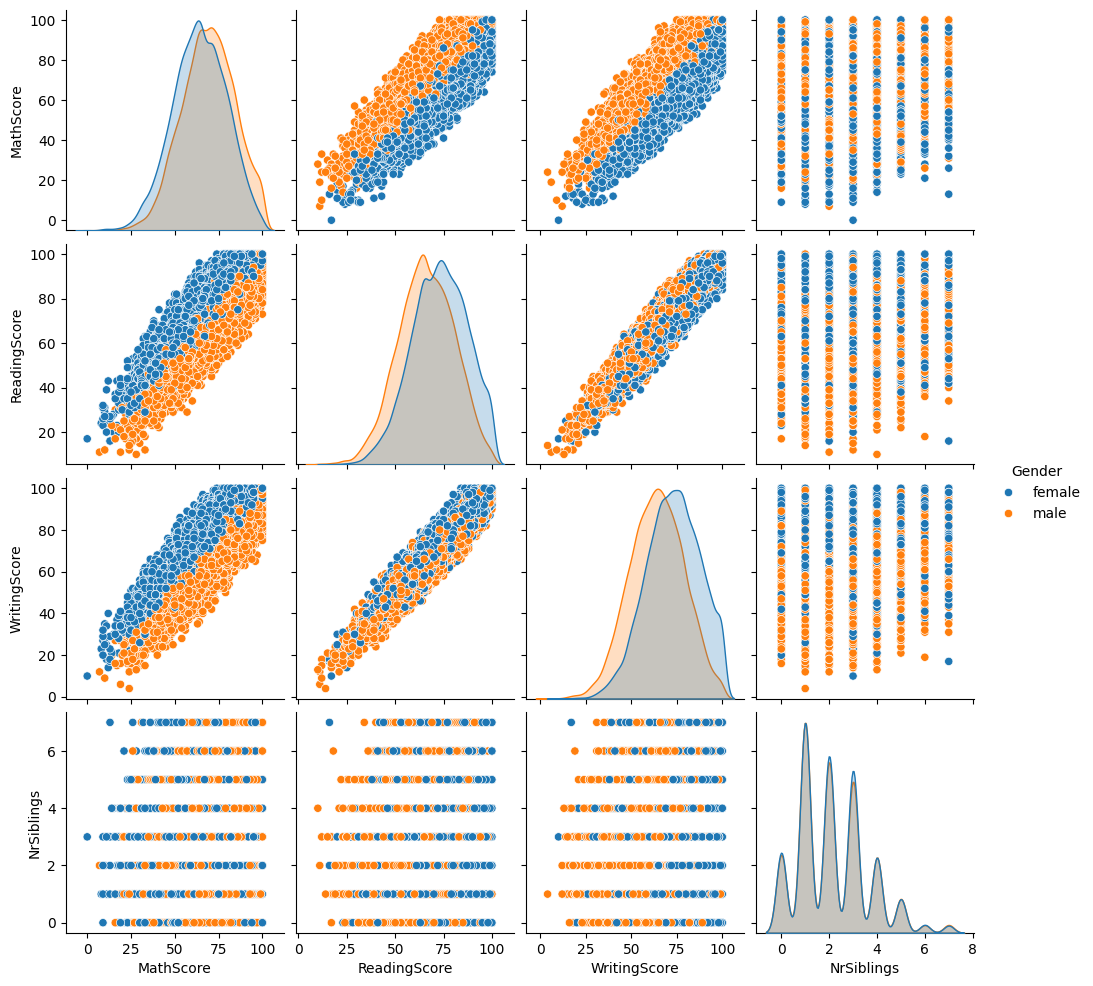

In [19]:
# 选择部分变量进行成对图绘制
sns.pairplot(cleaned_data[['Gender', 'MathScore', 'ReadingScore', 'WritingScore', 'WklyStudyHours', 'NrSiblings']], hue="Gender")
plt.show()

分析学生性别`Gender`与数学、阅读、写作成绩之间的关系。

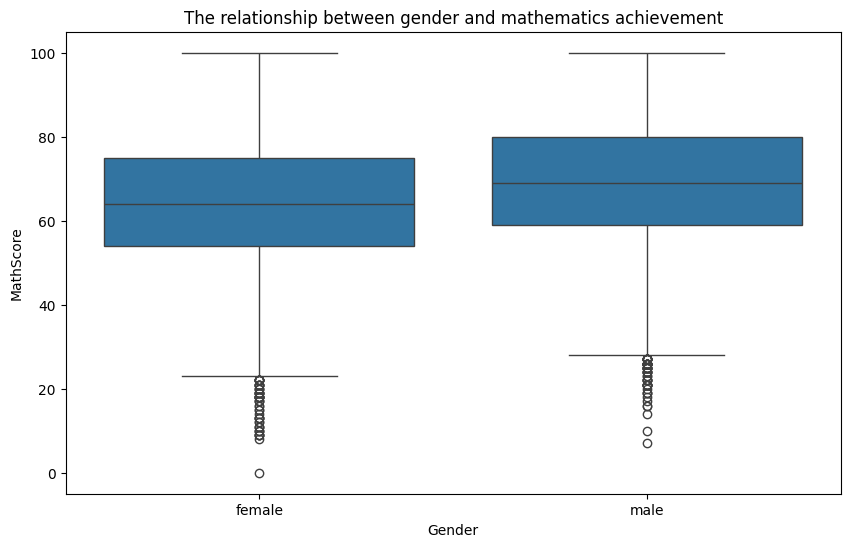

In [34]:
# y='ReadingScore'
# y='WritingScore'

# 绘制性别与数学成绩的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='MathScore', data=cleaned_data)
plt.title('The relationship between gender and mathematics achievement')
plt.xlabel('Gender')
plt.ylabel('MathScore')
plt.show()

分析家长教育背景`ParentEduc`对学生成绩的影响。

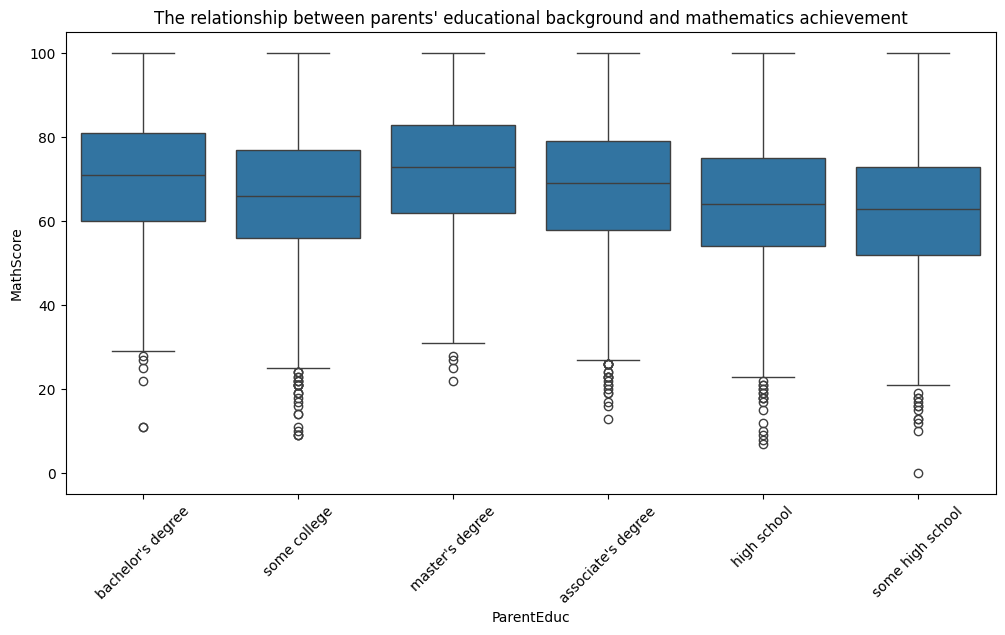

In [36]:
# y='ReadingScore'
# y='WritingScore'

# 绘制家长教育背景与数学成绩的箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='ParentEduc', y='MathScore', data=cleaned_data)
plt.title('The relationship between parents\' educational background and mathematics achievement')
plt.xlabel('ParentEduc')
plt.ylabel('MathScore')
plt.xticks(rotation=45)
plt.show()

分析父母婚姻状况`ParentMaritalStatus`对学生成绩的影响。

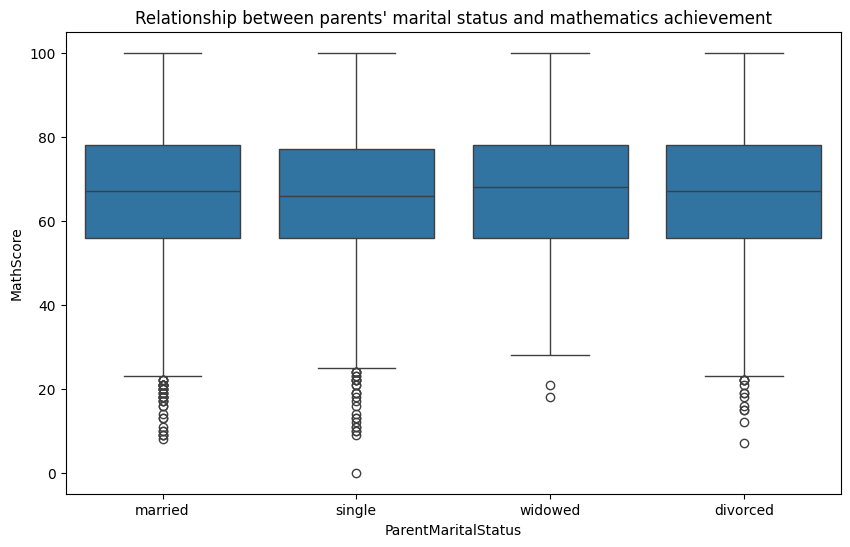

In [38]:
# y='ReadingScore'
# y='WritingScore'

# 绘制父母婚姻状况与数学成绩的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentMaritalStatus', y='MathScore', data=cleaned_data)
plt.title('Relationship between parents\' marital status and mathematics achievement')
plt.xlabel('ParentMaritalStatus')
plt.ylabel('MathScore')
plt.show()

分析每周自学时间（`WklyStudyHours`）对学生成绩的影响。

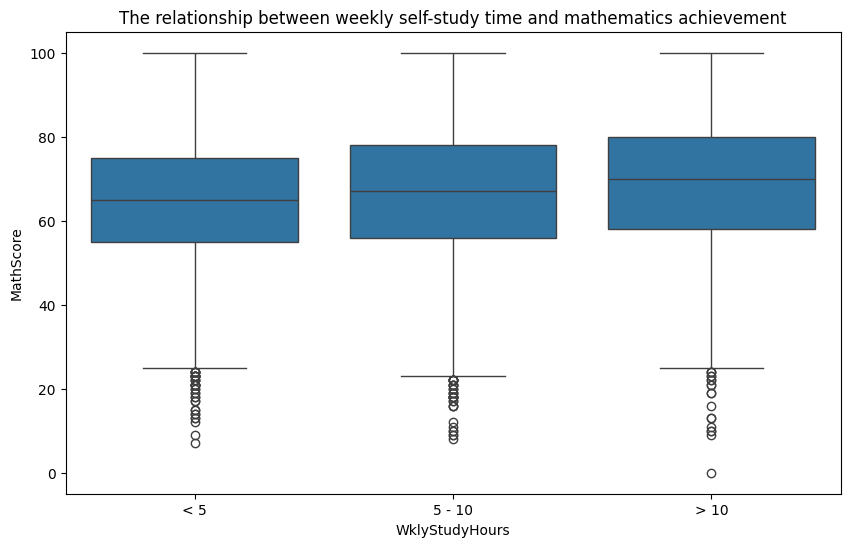

In [32]:
# y='ReadingScore'
# y='WritingScore'
plt.figure(figsize=(10, 6))
sns.boxplot(x='WklyStudyHours', y='MathScore', data=cleaned_data)
plt.title('The relationship between weekly self-study time and mathematics achievement')
plt.xlabel('WklyStudyHours')
plt.ylabel('MathScore')
plt.show()